In [1]:
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
import smplx
import cv2

# libraries for reading data from files
from scipy.io import loadmat
from PIL import Image
import pickle
import pytorch3d
import pandas as pd
import math

# add path for demo utils functions 
import sys
import itertools

In [55]:
textures = os.listdir("./all_texture")
all_textures = [cv2.imread("all_texture/"+t) for t in textures]

# textures_f = [cv2.imread("all_texture/"+t) for t in textures if "female" in t] # 451
# textures_m = [cv2.imread("all_texture/"+t) for t in textures if "female" not in t] # 478
# nongrey_textures = [t for t in textures if t.startswith("nongrey")] # 772
# grey_textures = [t for t in textures if t.startswith("grey")] # 157
# nongrey_textures_f = [n for n in nongrey_textures if "female" in n] # 363
# nongrey_textures_m = [n for n in nongrey_textures if "female" not in n] # 409

(512, 512, 3)


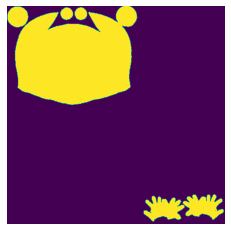

In [65]:
img = cv2.imread("all_texture/grey_female_0019.jpg")
print (img.shape)
mask = cv2.resize(cv2.imread("../AGORA/smplx_mask.png"), (512, 512))[...,0].astype(int)
texture_mask = mask<255
plt.imshow(texture_mask)
plt.axis("off")
plt.imsave("texture_mask.png", texture_mask, cmap="gray")
#cv2.imwrite("texture_mask.png", texture_mask)

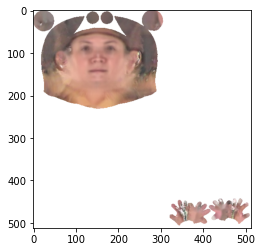

In [46]:
#masked_img = cv2.bitwise_and(img, img, mask=texture_mask)
new_mask = np.logical_not(texture_mask) # for background => we want white background eventually
#plt.imshow(new_mask)
img[new_mask]=255 # new_mask contains boolean entries and therefore can be used in this way
plt.imshow(np.flip(img, axis=-1))
#masked_img = cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB)

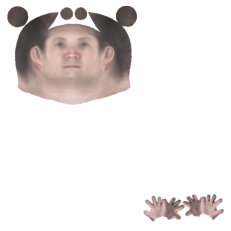

In [72]:
text_m = np.array(all_textures)
text_m = np.mean(text_m,axis=0)
text_m[new_mask]=255
text_m = text_m.astype(np.uint8)
plt.imshow(np.flip(text_m, axis=-1))
plt.axis("off")
plt.imsave("avg_text.png", np.flip(text_m, axis=-1))